In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproductibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations =  [x for x in range(11)] # Task durations
    task_priorities = [x for x in range(11)] # Task priorities
    robot_efficiencies = [0.1,0.01,0.2,0.3,0.4] # Robot efficiencies
    return task_durations, task_priorities, robot_efficiencies


In [2]:
# Function for initial population generation
def initialize_population(population_size, num_robots, num_tasks):
    return [np.random.randint(num_robots, size=num_tasks) for _ in range(population_size)]

# Fitness function calculation
def fitness_function(solution, task_durations, task_priorities, robot_efficiencies):
    # Calculate total production time
    total_times = np.zeros(len(robot_efficiencies))
    for task_idx, robot_idx in enumerate(solution):
        total_times[robot_idx] += task_durations[task_idx] / robot_efficiencies[robot_idx]
    total_production_time = np.max(total_times)

    # Calculate workload balance
    workload_balance = np.std(total_times)

    # Fitness function (minimize total production time and workload balance)
    fitness = total_production_time + workload_balance

    return fitness

# Tournament selection process
def tournament_selection(population, fitness_scores, tournament_size):
    selected_parents = []
    for _ in range(2):  # Select 2 parents
        if tournament_size > len(population):
            tournament_size = len(population)
        tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        tournament_fitness = [fitness_scores[i] for i in tournament_indices]
        winner_index = tournament_indices[np.argmin(tournament_fitness)]  # Choose the winner with the lowest fitness
        selected_parents.append(population[winner_index])
    return selected_parents

# Single-point crossover operation
def single_point_crossover(parent1, parent2, crossover_point):
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation operation (task swapping)
def mutation(child, mutation_rate):
    if np.random.rand() < mutation_rate:
        idx1, idx2 = np.random.choice(len(child), size=2, replace=False)
        child[idx1], child[idx2] = child[idx2], child[idx1]  # Swap the robots for the selected tasks
    return child


In [3]:
# Placeholder for GA implementation
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, k):
    population_size = 50
    n_generations = 100
    mutation_rate = 0.1
    tournament_size = 5

    # Initialize population
    population = initialize_population(population_size, len(robot_efficiencies), len(task_durations))

    for generation in range(n_generations):
        # Evaluate fitness of each individual in the population
        fitness_scores = [fitness_function(individual, task_durations, task_priorities, robot_efficiencies) for individual in population]

        # Select parents for crossover (using tournament selection)
        selected_parents = tournament_selection(population, fitness_scores, tournament_size)

        # Perform crossover and mutation to create new individuals (offspring)
        offspring = []
        for parent1, parent2 in zip(selected_parents[::2], selected_parents[1::2]):
            child1, child2 = single_point_crossover(parent1, parent2, k)
            child1 = mutation(child1, mutation_rate)
            child2 = mutation(child2, mutation_rate)
            offspring.extend([child1, child2])

        # Replace old population with new generation
        population = offspring

    # Get the best solution after GA converges
    best_solution_index = np.argmin(fitness_scores)
    best_solution = population[best_solution_index]

    return best_solution


In [4]:
# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            priority = task_priorities[j]
            duration = task_durations[j]
            ax.text(j, i, f'P{priority}\n{duration}h', ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()


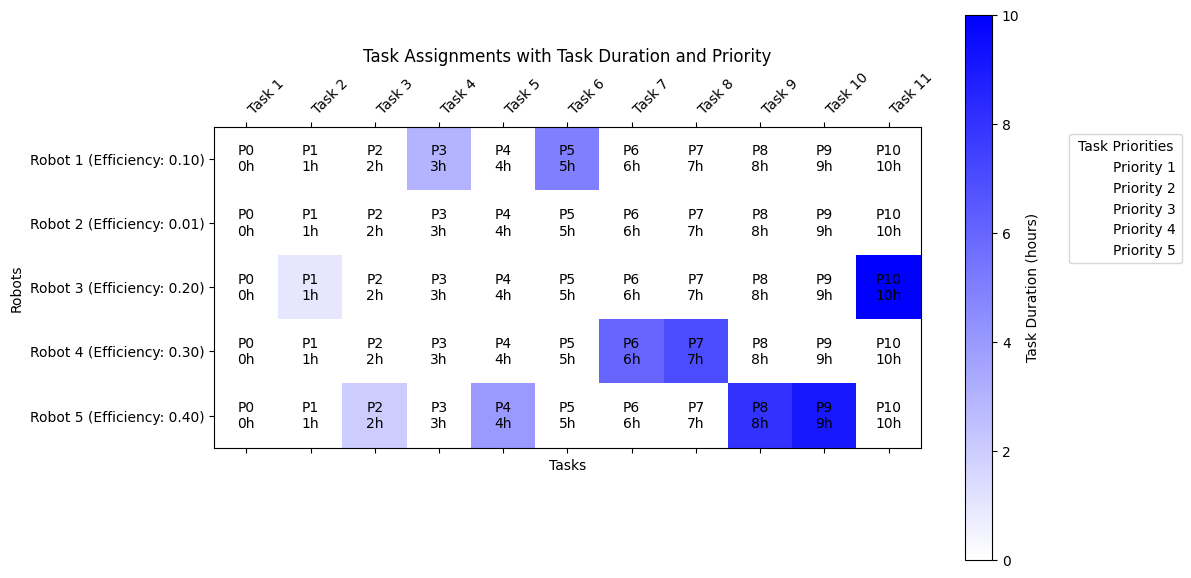

In [5]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    k = 3  # Crossover point
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, k)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)